In [5]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
pf_data.tail()

,PG,^GSPC
Date,,
2020-02-03,125.110001,3248.919922
2020-02-04,125.660004,3297.590088
2020-02-05,126.809998,3334.689941
2020-02-06,127.139999,3345.780029
2020-02-07,126.080002,3327.709961


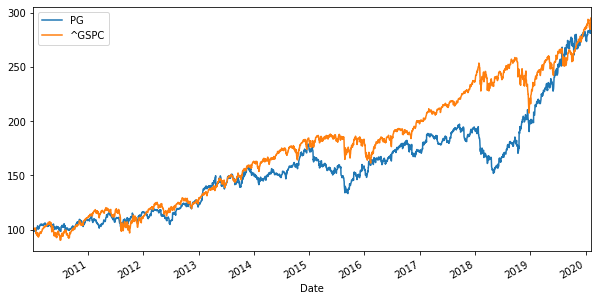

In [6]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [7]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [8]:
log_returns.mean() * 250

PG       0.102789
^GSPC    0.106004
dtype: float64

In [9]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.021597,0.011233
^GSPC,0.011233,0.021633


In [10]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.519702
^GSPC,0.519702,1.000000


In [11]:
num_assets = len(assets)

In [12]:
num_assets

2

In [13]:
arr = np.random.random(2)
arr

array([0.69978751, 0.85024933])

In [14]:
weights = np.random.random(num_assets)
weights /=np.sum(weights)
weights

array([0.24444758, 0.75555242])

In [15]:
weights[0] + weights[1]

1.0

## Expected Portfolio Return:

In [17]:
np.sum(weights * log_returns.mean()) * 250

0.10521802462623871

## Expected Portfolio Variance:

In [18]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.017789539800060747

## Expected Portfolio Volatility:

In [19]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.13337743362376092

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_volatilities

([0.10554544591925583,
  0.10473076670292407,
  0.10330888363692062,
  0.10516727411265964,
  0.10395046624132599,
  0.10558552996626533,
  0.10377606136370093,
  0.10502934582391563,
  0.10588632024552114,
  0.10499468515486182,
  0.10290846044353917,
  0.10516072810874066,
  0.10436567926468693,
  0.10310902891555825,
  0.1046748128511056,
  0.10454336686261775,
  0.10462132893105874,
  0.1034403666731098,
  0.10467344246091077,
  0.1031098139129462,
  0.10552481916068077,
  0.10419033718118983,
  0.10474491324371062,
  0.10495313084437223,
  0.10363334772155726,
  0.10455548189869594,
  0.10513909666781866,
  0.10351465120225933,
  0.10555927830891863,
  0.10294388742736058,
  0.10516129154416091,
  0.10461688829676023,
  0.10433945857864663,
  0.10523495987493119,
  0.10385523843876981,
  0.10484085080534448,
  0.10574419411008437,
  0.10520242616261032,
  0.10375214251757804,
  0.10327928282336044,
  0.10357724171844619,
  0.10299735262878336,
  0.10428545271256197,
  0.1051530113

In [21]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.10520239, 0.10348933, 0.10281775, 0.10599545, 0.10308865,
        0.10442342, 0.10306987, 0.10401687, 0.10541487, 0.10537414,
        0.1035441 , 0.10599263, 0.10533748, 0.1049053 , 0.10455688,
        0.10568547, 0.10407771, 0.10317081, 0.10496766, 0.1054962 ,
        0.10355784, 0.1038211 , 0.10484743, 0.10309415, 0.10436733,
        0.10410885, 0.10334497, 0.10590004, 0.10311263, 0.1038532 ,
        0.10423241, 0.10340485, 0.10456401, 0.10348795, 0.10432341,
        0.10481726, 0.10541179, 0.10338585, 0.10286467, 0.10448588,
        0.10578577, 0.10520049, 0.1028972 , 0.10322298, 0.10359203,
        0.10401033, 0.10523453, 0.10383155, 0.10475857, 0.1053683 ,
        0.10365715, 0.1044749 , 0.10309388, 0.10445291, 0.10417066,
        0.10575933, 0.10457988, 0.1055467 , 0.10408281, 0.10334907,
        0.10505414, 0.10469408, 0.10378927, 0.10385668, 0.10466693,
        0.10484068, 0.10449341, 0.10459419, 0.1032847 , 0.10374626,
        0.10485719, 0.10384552, 0.10409683, 0.10

In [22]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [23]:
portfolios.head()

,Return,Volatility
0,0.105202,0.133185
1,0.103489,0.134411
2,0.102818,0.146328
3,0.105995,0.146896
4,0.103089,0.140870


In [24]:
portfolios.tail()

,Return,Volatility
995,0.104658,0.128703
996,0.104543,0.128332
997,0.103804,0.130850
998,0.104136,0.128675
999,0.103677,0.132123


Text(0, 0.5, 'Expected Return')

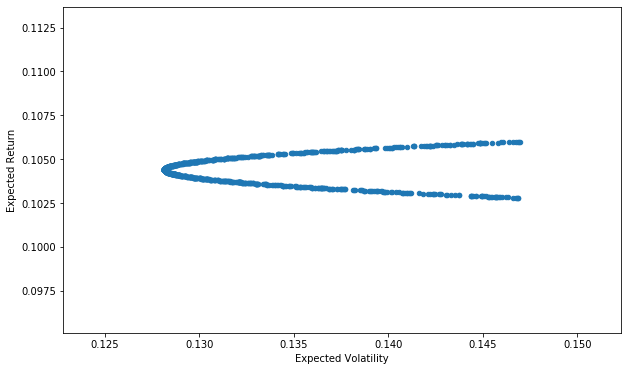

In [25]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')